https://towardsdatascience.com/computer-vision-for-beginners-part-1-7cca775f58ef

In [1]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline

# OpenCV color standard is BGR (Blue, Green, Red)
# So when the image is displayed, it'll look kinda funny until you convert it to RGB
img = cv2.imread('Pepsi_logo_2014.png')
print(cv2.__version__)
type(img)

4.1.2


numpy.ndarray

In [ ]:
# All OpenCV color transformations
print([x for x in dir(cv2) if x.startswith('COLOR_')])

In [2]:
# simple function to return heigh/width/depth; frequently used throughout for verification
def image_dimensions(img):
    img_dim = ('Height:','Width: ','Depth: ')
    
    for i in range(img.ndim):
        print(img_dim[i],img.shape[i])

In [3]:
# split and display each color individually; not really sure if it will be important going forward, but just in case
def split_color_display (img):
    # Plot the three channels of the image
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

    for i in range(0, 3):
        ax = axs[i]
        ax.imshow(cv2.split(img)[i])
    plt.show()

How-To Blend Images: https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html

In [4]:
# blends two images together; essentially adding both their matrices
def blend_images (src1, src2, alpha):
    
    height_1, width_1, depth_1 = src1.shape # get shape of image 1
    height_2, width_2, depth_2 = src2.shape # get shape of image 2
    src3 = cv2.resize(src2, (width_1,height_1)) # resize image 2 to match image 1
    
    # [blend_images]
    beta = (1.0 - alpha) # alpha/beta is % of blend. higher alpha = more of image 1, lower alpha = more of image 2
    new_img = cv2.addWeighted(src1, alpha, src3, beta, 0.0)
    
    return new_img

In [5]:
# measures two images, resizes 'source' image to match the size of the 'destination' image
def resize_image (destination, source):
    
    height_1, width_1, depth_1 = destination.shape # get shape of image 1
    height_2, width_2, depth_2 = source.shape # get shape of image 2
    
    if (height_1==height_2 & width_1==width_2):
        target = source
    else:
        target = cv2.resize(source, (width_1,height_1)) # resize image 2 to match image 1
        
    return target

In [6]:
# rotates an image counter-clockwise by [degrees]
# [shrinkage] is a percentage that shrinks the image (to ensure it stays within the image dimension bounds)
# eg. rotate_image(img, 45, 0.7) will take the [img], 
# rotate it 45 degrees counter-clockwise and shrink it to 70% of its orignal size
def rotate_image (img, degrees, shrinkage):
    num_rows, num_cols = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), degrees, shrinkage)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
    return rotated_img

Height: 2752
Width:  2000
Depth:  3


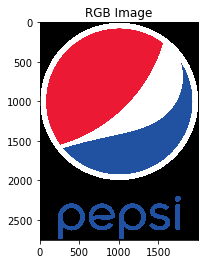

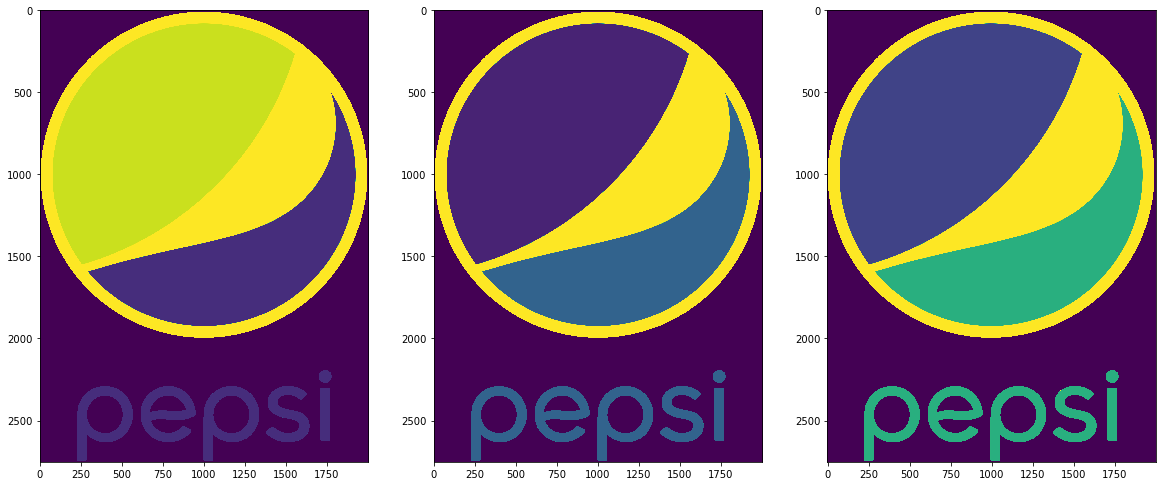

In [7]:
# Convert img from BGR to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_dimensions(rgb_img) # print image dimensions

plt.title('RGB Image')
plt.imshow(rgb_img)

split_color_display(rgb_img) # split all three colors into separate plots

Height: 2752
Width:  2000


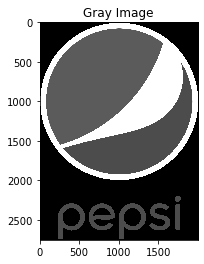

In [8]:
# Convert img from BGR to GRAYSCALE
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

image_dimensions(gray_img)

plt.title('Gray Image')
plt.imshow(gray_img, cmap='gray')

Height: 2752
Width:  2000
Depth:  3


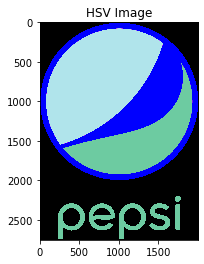

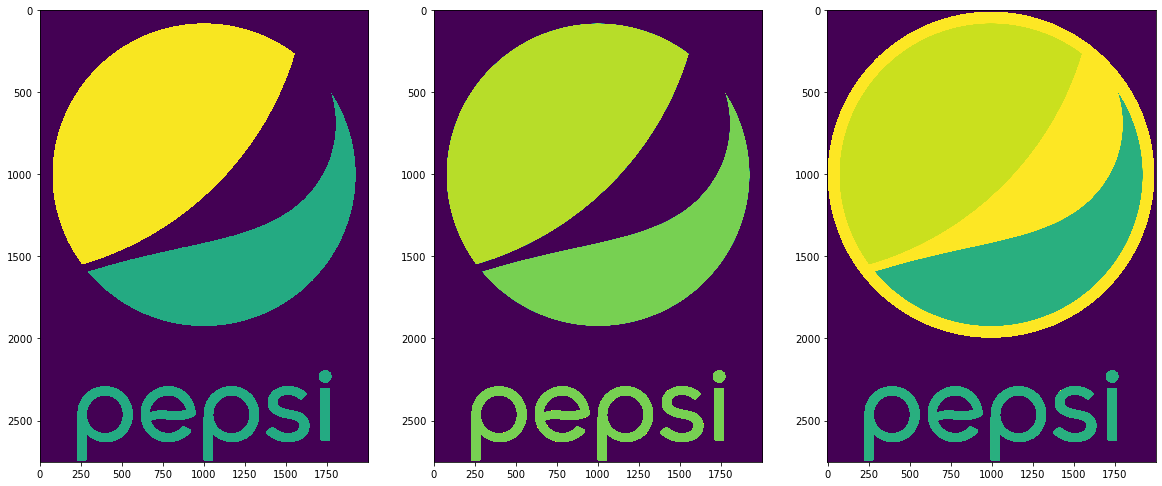

In [9]:
# Convert img from BGR to GRAYSCALE
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
image_dimensions(hsv_img)

plt.title('HSV Image')
plt.imshow(hsv_img)

split_color_display(hsv_img)

First Image to be merged


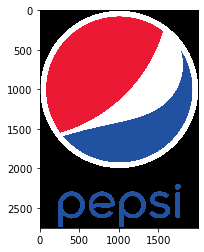

Second Image to be merged


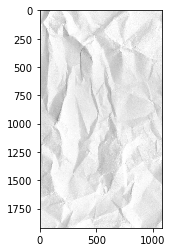

Height: 2752
Width:  2000
Depth:  3
Merged Image


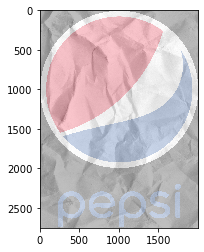

In [10]:
# combine pepsi logo with crumpled paper
img1 = rgb_img
img2 = cv2.imread('crumpled-paper.jpg')

print('First Image to be merged')
plt.figure()
plt.imshow(img1)
plt.show()

print('Second Image to be merged')
plt.figure()
plt.imshow(img2)
plt.show()

new_img2 = resize_image(img1,img2)
blended_image = blend_images(img1,new_img2,.25)
image_dimensions(blended_image)

print('Merged Image')
plt.figure()
plt.imshow(blended_image)
plt.show()

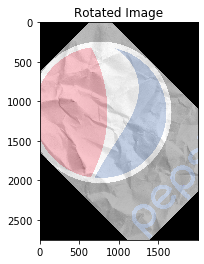

In [11]:
#rotate combined pepsi/paper logo
rotated_img = rotate_image(blended_image, 45, .9)
plt.title("Rotated Image")
plt.imshow(rotated_img)

Affine Transformations: https://www.cis.rit.edu/class/simg782/lectures/lecture_02/lec782_05_02.pdf

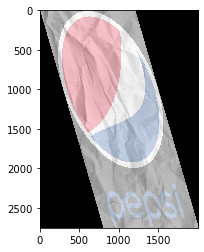

In [12]:
# basically transforming the image without maintaining its dimensions
# 'src_points' is your dimensions of your image
# 'dst_points' is your future dimensions of your image (eg. from square to parellogram etc)
# still fiddling, trying to understand the math behind the code sample before I generalize the code

rows, cols = blended_image.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0],[int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(blended_image, affine_matrix, (cols,rows))
plt.imshow(img_output)

### Methods to draw lines/polygons on an image

In [13]:
# draws line between two randomly generated points within this method
# takes in image, line color and line thickness; returns modified image
def draw_random_line(img, line_color, line_thickness):
    img_width, img_height = img.shape[:2]
    start_point = (random.randrange(0,img_width),random.randrange(0,img_height))
    end_point = (random.randrange(0,img_width),random.randrange(0,img_height))
    
    new_img = cv2.line(img,start_point,end_point,line_color,line_thickness)
    
    return new_img

In [14]:
# draws a circle centered around a point randomly generated within this method
# takes in image, size of radius and color; returns modified image

def draw_random_circle(img, circle_radius, circle_color, thickness):
    img_width, img_height = img.shape[:2]
    center_coordinates = (random.randrange(0,img_width),random.randrange(0,img_height))
    
    new_img = cv2.circle(img,center_coordinates,circle_radius,circle_color,thickness)
    
    return new_img

In [15]:
# draws a polygon around points randomly generated within this method
# takes in image, number of points for the polygon, color and line thickness; returns modified image

def draw_random_polygon(img,num_points,poly_color,poly_thickness):
    img_width, img_height = img.shape[:2]
    poly_coordinates = []
    
    for i in range(0,num_points):
        random_x = random.randrange(0,img_width)
        random_y = random.randrange(0,img_height)
        poly_coordinates.append((random_x,random_y))
    
    poly_coordinates = np.array([poly_coordinates],np.int32)
#     print(poly_coordinates.dtype)
    
    poly_img = cv2.polylines(img,poly_coordinates,True,poly_color,poly_thickness)
    
    return poly_img

In [16]:
# draws a filled polygon around points randomly generated within this method
# takes in image, number of points, and color; returns modified image

def draw_random_filled_polygon(img,num_points,poly_color):
    img_width, img_height = img.shape[:2]
    poly_coordinates = []
    
    for i in range(0,num_points):
        random_x = random.randrange(0,img_width)
        random_y = random.randrange(0,img_height)
        poly_coordinates.append((random_x,random_y))
    
    poly_coordinates = np.array([poly_coordinates],np.int32)
#     print(poly_coordinates.dtype)

    poly_img = cv2.fillPoly(img,poly_coordinates,poly_color)
    
    return poly_img

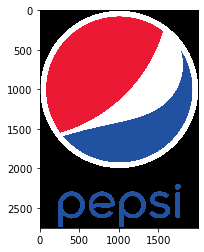

In [17]:
rgb_img_copy = rgb_img.copy()

plt.figure()
plt.imshow(rgb_img_copy)

int32


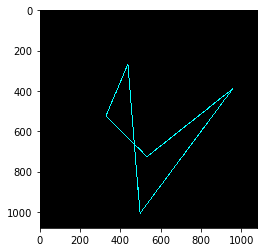

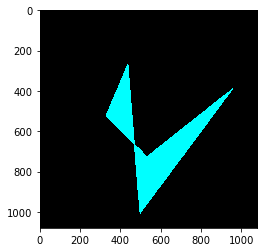

In [18]:
# code used to fine-tune on drawing (un)filled polygons

img = np.zeros((1080,1080,3),dtype='uint8')
img_width, img_height = img.shape[:2]
num_points = 5
poly_coordinates = []
line_color = (0,255,255)
line_thickness = 3

for i in range(0,num_points):
    random_x = random.randrange(0,img_width)
    random_y = random.randrange(0,img_height)
    
    poly_coordinates.append((random_x,random_y))

poly_coordinates = np.array([poly_coordinates],np.int32)
# poly_coordinates.reshape((-1,1,2))
print(poly_coordinates.dtype)

new_img = cv2.polylines(img,poly_coordinates,True,line_color,line_thickness)

plt.figure()
plt.imshow(new_img)

filled_img = cv2.fillPoly(new_img,poly_coordinates,line_color)
plt.figure()
plt.imshow(filled_img)

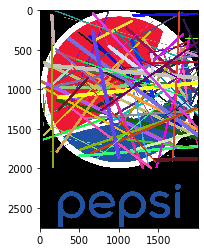

In [19]:
# calls method to draw line on image
# number of lines to draw is set below
# line_thickness is randomized
# color is randomized

img_lines = rgb_img_copy.copy()
number_of_lines = 100
for i in range(0,number_of_lines):
    line_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    line_thickness = random.randint(1,50)
    img_line = draw_random_line(img_lines,line_color,line_thickness)

plt.figure()
plt.imshow(img_lines)

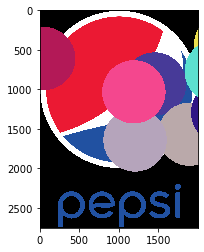

In [20]:
# calls method to draw circle on image
# number of circles to draw is set below in loop
# radius is randomized within size range below
# line_thickness is randomized
# if line_thickness = -1, circle is filled
# color is randomized

img_circle = rgb_img.copy()

number_of_circles = 10
radius = random.randint(100,500)
circle_thickness = -1

for i in range(0,number_of_circles):
    circle_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    img_circle = draw_random_circle(img_circle,radius,circle_color,circle_thickness)

plt.figure()
plt.imshow(img_circle)

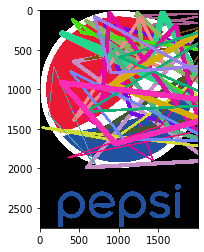

In [21]:
# calls method to draw empty polygon on image
# number of points (faces) per polygon is set below
# number of polygons to draw is set below
# line_thickness is randomized
# color is randomized

img_polygon = rgb_img.copy()
num_points = 4

for i in range(0,20):
    poly_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    line_thickness = random.randint(10,80)
    img_polygon = draw_random_polygon(img_polygon,num_points,poly_color,line_thickness)

plt.figure()
plt.imshow(img_polygon)

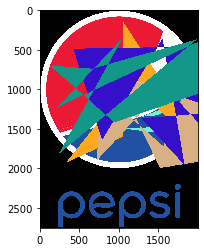

In [22]:
# calls method to draw filled polygon on image
# number of points (faces) per polygon is set below
# number of polygons to draw is set below
# color is randomized

img_filled_polygon = rgb_img.copy()
num_points = 9
for i in range(0,5):
    poly_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    img_filled_polygon = draw_random_filled_polygon(img_filled_polygon,num_points,poly_color)

plt.figure()
plt.imshow(img_filled_polygon)